In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from  sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
#reading the data
data1 = pd.read_csv('Company_Data.csv')
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data1['sales']="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [5]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,large
1,111,48,16,260,83,Good,65,10,Yes,Yes,large
2,113,35,10,269,80,Medium,59,12,Yes,Yes,large
3,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,141,64,3,340,128,Bad,38,13,Yes,No,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,large
396,139,23,3,37,120,Medium,55,11,No,Yes,small
397,162,26,12,368,159,Medium,40,18,Yes,Yes,small
398,100,79,7,284,95,Bad,50,12,Yes,Yes,small


In [6]:
#getting information of dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [7]:
data1.shape

(400, 11)

In [8]:
data1.isnull().any()


CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
sales          False
dtype: bool

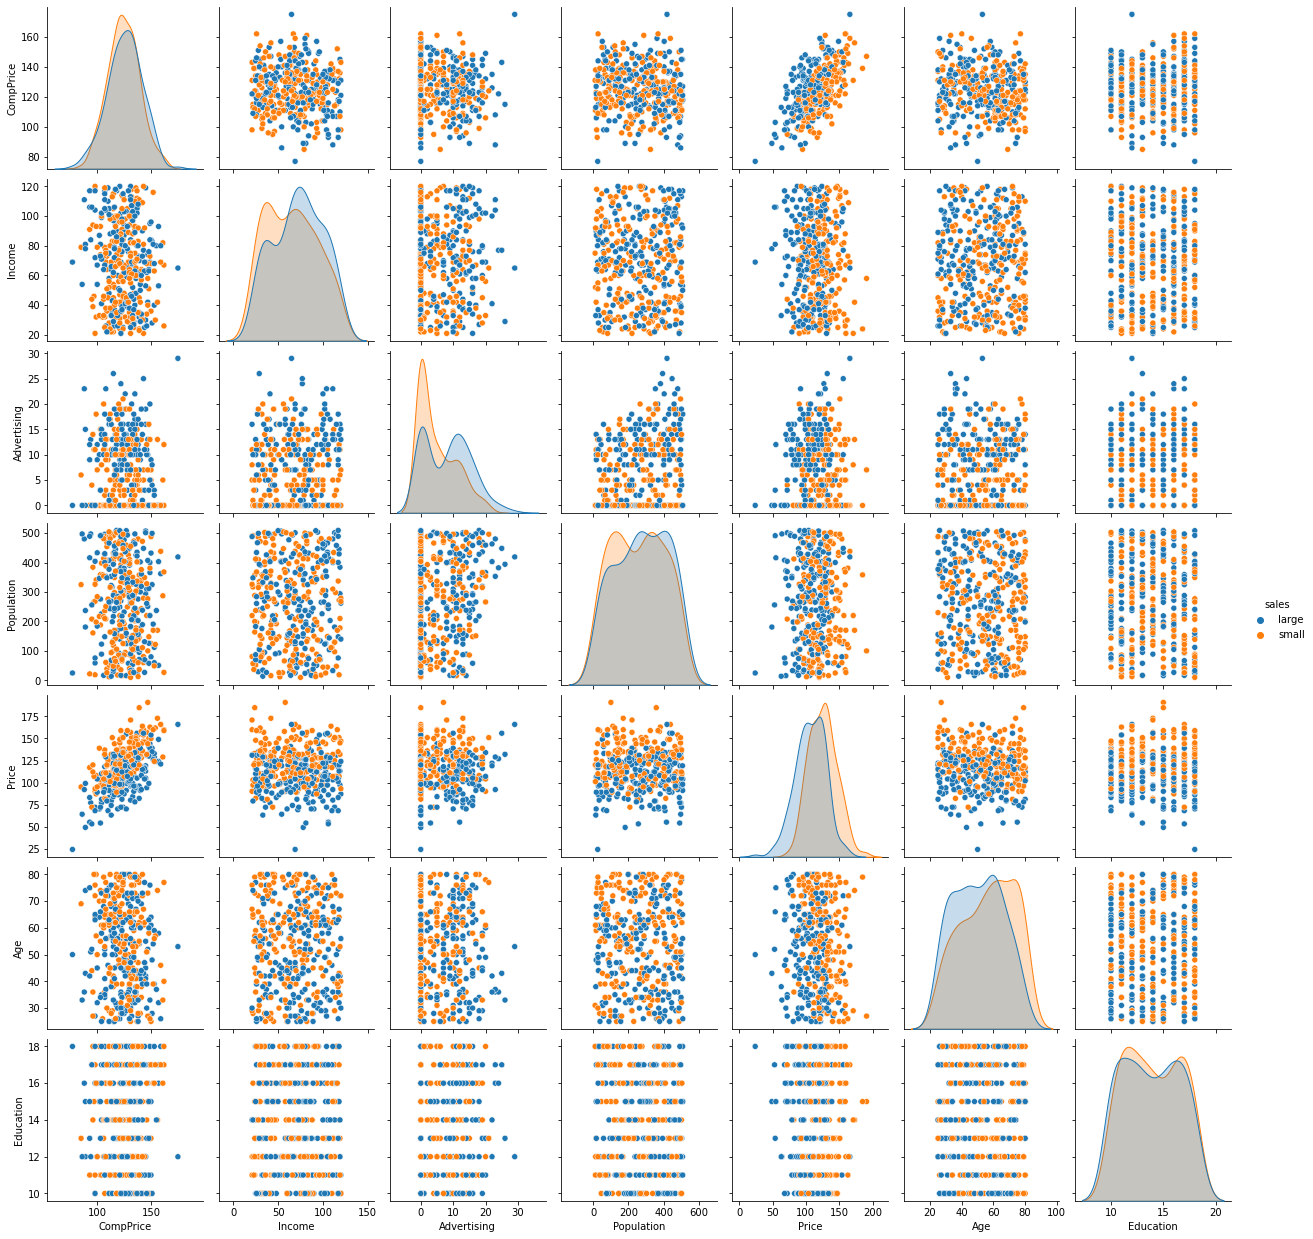

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data1, hue = 'sales')


In [11]:
#Creating dummy vairables dropping first dummy variable
data1=pd.get_dummies(data1,columns=['Urban','US'], drop_first=True)

In [12]:
print(data1.head())

   CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education  sales  Urban_Yes  US_Yes  
0         17  large          1       1  
1         10  large          1       1  
2         12  large          1       1  
3         14  small          1       1  
4         13  small          1       0  


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   sales        400 non-null    object
 9   Urban_Yes    400 non-null    uint8 
 10  US_Yes       400 non-null    uint8 
dtypes: int64(7), object(2), uint8(2)
memory usage: 29.0+ KB


In [14]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [15]:
data1['sales']=data1['sales'].map({'Good':1,'Medium':2,'Bad':3})

In [16]:
print(data1.head())

   CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education  sales  Urban_Yes  US_Yes  
0         17    NaN          1       1  
1         10    NaN          1       1  
2         12    NaN          1       1  
3         14    NaN          1       1  
4         13    NaN          1       0  


In [19]:
x=data1.iloc[:,0:6]
y=data1['sales']

In [20]:
x


,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,138,73,11,276,120,Bad
1,111,48,16,260,83,Good
2,113,35,10,269,80,Medium
3,117,100,4,466,97,Medium
4,141,64,3,340,128,Bad
...,...,...,...,...,...,...
395,138,108,17,203,128,Good
396,139,23,3,37,120,Medium
397,162,26,12,368,159,Medium
398,100,79,7,284,95,Bad


In [21]:
y


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
395   NaN
396   NaN
397   NaN
398   NaN
399   NaN
Name: sales, Length: 400, dtype: float64

In [23]:
data1['sales'].unique()


array([nan])

In [25]:
data1.sales.value_counts()


Series([], Name: sales, dtype: int64)

In [26]:
colnames = list(data1.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'sales',
 'Urban_Yes',
 'US_Yes']

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Decision Tree Regression Example


In [53]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [54]:
array = data1.values
X = array[:,0:3]
y = array[:,3]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [56]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
#Find the accuracy
model.score(X_test,y_test)

-0.8781169916007008